In [1]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import xarray as xr
import matplotlib.pyplot as plt
# import geopandas as gp
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#obvi change these
shape_olr=5
shape_pph = 10
shape_wg = 10


olr_input = tf.Input(shape=shape_olr, title='img_olr')

pph_input = tf.Input(shape=shape_pph, title='img_pph')

wg_input = tf.Input(shape=shape_wg, title='img_wg')


In [ ]:
input_pph = keras.Input(shape=(65, 93, 3), name="img")
input_wg = keras.Input(shape=(51, 214, 3), name="img")
input_olr = keras.Input(shape=(13, 144, 3), name="img")

# inputs =

x1 = layers.Conv2D(65, 4, activation='relu' )(input_pph)
# x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D((2,2))(x1)

x2 = layers.Conv2D(51, 3, activation='relu' )(input_pph)


x3 = layers.Conv2D(144, 3, activation='relu' )(input_pph)



# x = layers.Conv2D(32, 3, activation="relu")(inputs)
# x = layers.Conv2D(64, 3, activation="relu")(x)
# block_1_output = layers.MaxPooling2D(3)(x)

# x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
# x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
# block_2_output = layers.add([x, block_1_output])

# x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
# x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
# block_3_output = layers.add([x, block_2_output])

# x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
# x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dense(256, activation="relu")(x)
# x = layers.Dropout(0.5)(x)


outputs = layers.Dense(10)(block_1_output)

model = keras.Model(input_pph, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 65, 93, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 62, 90, 65)        3185      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 45, 65)       0         
 )                                                               
                                                                 
 dense (Dense)               (None, 31, 45, 10)        660       
                                                                 
Total params: 3,845
Trainable params: 3,845
Non-trainable params: 0
_________________________________________________________________


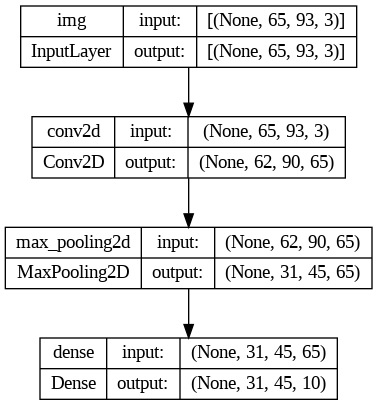

In [ ]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)


1
2
1
2
1
2
Model: "toy_resnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 51, 214, 3)]      0         
                                                                 
 conv2d_24 (Conv2D)          (None, 51, 214, 6)        168       
                                                                 
 conv2d_25 (Conv2D)          (None, 51, 214, 12)       660       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 25, 107, 12)      0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 25, 107, 12)       1308      
                                                                 
 conv2d_27 (Conv2D)          (None, 25, 107, 18)       1962      
                                            

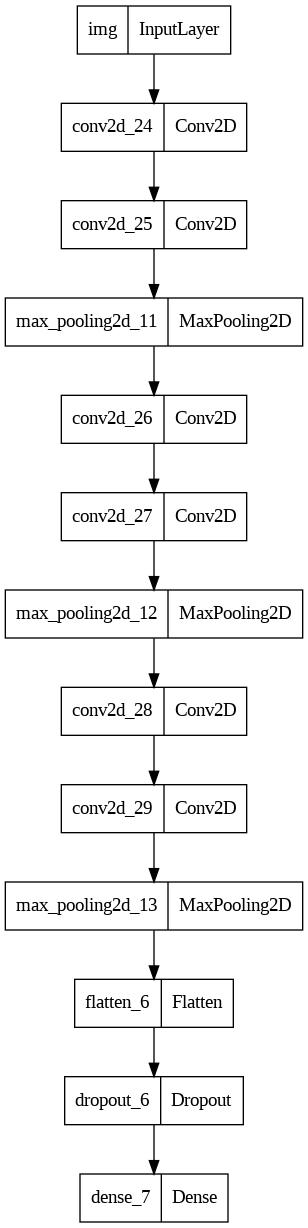

In [ ]:
# rounds
# c_layers_p_round

# i, (n, s, p) in enumerate(zip(n_filters, kernel_size, pooling))

n_filters = [9,18]
activation = 'relu'

# might need a c_layer_p_round

def one_side_func(input_x, rounds, n_c2d_filters, n_c2d_r, kernel_size):
  # if len(n_c2d_filters)%rounds != 0:
  #   return "Incorrect number of filters"
  # else:
  i = 0
  x = input_x
  while i < rounds:
    for n in range(1,n_c2d_r+1):
      print(n)
      x = layers.Conv2D(filters=n_c2d_filters*int(n+i), kernel_size= kernel_size, activation='relu', padding='same')(x)
    # print(d)
    x = layers.MaxPooling2D((2,2))(x)
    i = i+1
  x = layers.Flatten()(x)
  return(x)

x1 = one_side_func(input_wg, rounds=3, n_c2d_filters=6, n_c2d_r=2, kernel_size=3)
x1 = layers.Dropout(0.005)(x1)
outputs = layers.Dense(3)(x1)


model = keras.Model(
    inputs = [input_wg],
    outputs = outputs,
    name="toy_resnet")
model.summary()
keras.utils.plot_model(model)



Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_olr (InputLayer)         [(None, 13, 144, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 input_wg (InputLayer)          [(None, 51, 214, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_24 (Conv2D)             (None, 13, 144, 9)   252         ['input_olr[0][0]']              
                                                                                         

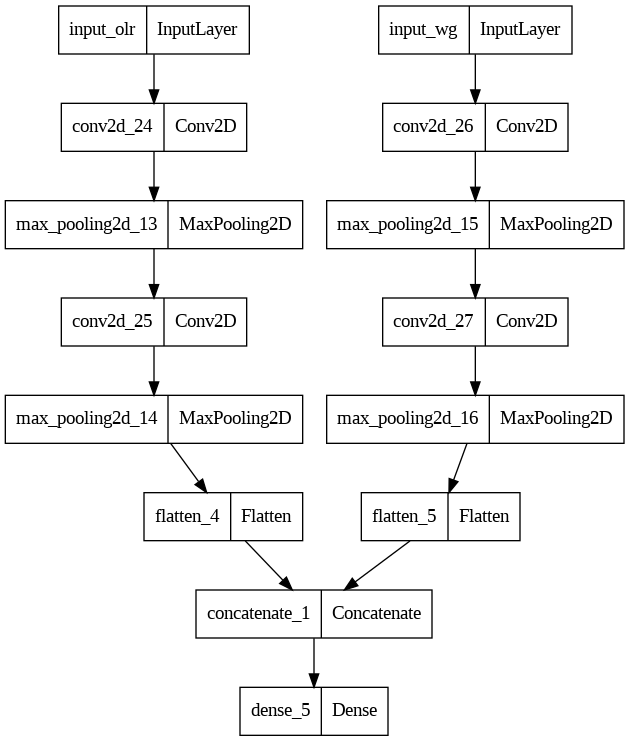

In [ ]:
input_wg = keras.Input(shape=(51, 214, 3), name="input_wg")
input_olr = keras.Input(shape=(13, 144, 3), name="input_olr")

x1 = layers.Conv2D(filters=9, kernel_size= 3, activation='relu', padding='same')(input_olr)
x1=layers.MaxPooling2D((2,2))(x1)
x1 = layers.Conv2D(filters=18, kernel_size= 3, activation='relu', padding='same')(x1)
x1=layers.MaxPooling2D((2,2))(x1)
x1 = layers.Flatten()(x1)

x2 = layers.Conv2D(filters=9, kernel_size= 3, activation='relu', padding='same')(input_wg)
x2=layers.MaxPooling2D((2,2))(x2)
x2 = layers.Conv2D(filters=18, kernel_size= 3, activation='relu', padding='same')(x2)
x2=layers.MaxPooling2D((2,2))(x2)

x2=layers.Flatten()(x2)

x = layers.concatenate([x1, x2])
#dropout
outputs = layers.Dense(3)(x)


model = keras.Model(
    inputs = [input_wg, input_olr],
    outputs = outputs,
    name="toy_resnet")
model.summary()
keras.utils.plot_model(model)

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_wg (InputLayer)          [(None, 30, 51, 241  0           []                               
                                , 2)]                                                             
                                                                                                  
 conv3d_6 (Conv3D)              (None, 30, 51, 241,  495         ['input_wg[0][0]']               
                                 9)                                                               
                                                                                                  
 conv3d_7 (Conv3D)              (None, 30, 51, 241,  4392        ['conv3d_6[0][0]']               
                                 18)                                                     

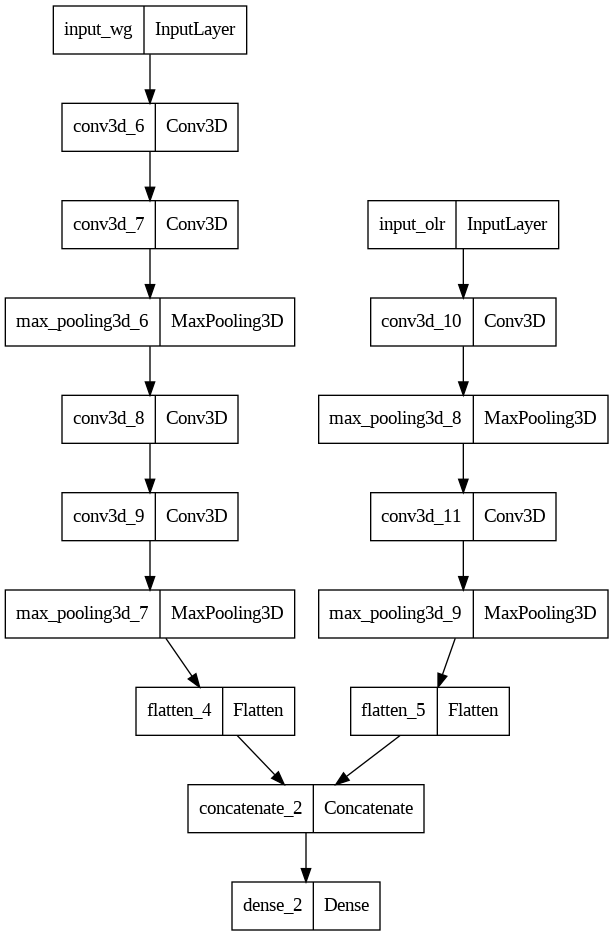

In [ ]:
# remaking above with the function
input_wg = keras.Input(shape=(30, 51, 241, 2), name="input_wg")
input_olr = keras.Input(shape=(30, 13, 144, 1), name="input_olr")

x1 = one_side_func(input_wg, 2, [9, 18, 18, 36], 3)
x2 = one_side_func(input_olr, 2, [9, 18], 3)

x = layers.concatenate([x1, x2])

outputs = layers.Dense(9)(x)


model = keras.Model(
    inputs = [input_wg, input_olr],
    outputs = outputs,
    name="toy_resnet")
model.summary()
keras.utils.plot_model(model)

In [ ]:
def one_side_func(input_x, rounds, n_c2d_filters, kernel_size):
  if len(n_c2d_filters)%rounds != 0:
    return "Incorrect number of filters"
  else:
    i = 0
    x = input_x
    d = int(len(n_c2d_filters)/rounds)
    while i < rounds:
      for n in range(d):
        x = layers.Conv3D(filters=n_c2d_filters[int(n+d*i)], kernel_size= kernel_size, activation='relu', padding='same')(x)
      # print(d)
      x = layers.MaxPooling3D((2,2,2))(x)
      i = i+1
    x = layers.Flatten()(x)
    return(x)

In [ ]:
def conv_2d_max_pool_seq (input_x, rounds, n_c2d_filters, n_c2d_r, activation, kernel_size=3):
    i = 0
    x = input_x
    while i < rounds:
        for n in range(1,n_c2d_r+1):
            x = layers.Conv3D(filters=n_c2d_filters*int(n+i), kernel_size= kernel_size, activation=activation, padding='same')(x)
            # print(d)
        x = layers.MaxPooling3D((2,2,2))(x)
        i = i+1
    x = layers.Flatten()(x)
    return(x)

# IMPORTANT ONES AFTER THIS MESSAGE:

Model: "tr"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_wg (InputLayer)          [(None, 30, 51, 241  0           []                               
                                , 2)]                                                             
                                                                                                  
 conv3d (Conv3D)                (None, 30, 51, 241,  495         ['input_wg[0][0]']               
                                 9)                                                               
                                                                                                  
 input_olr (InputLayer)         [(None, 30, 13, 144  0           []                               
                                , 1)]                                                            

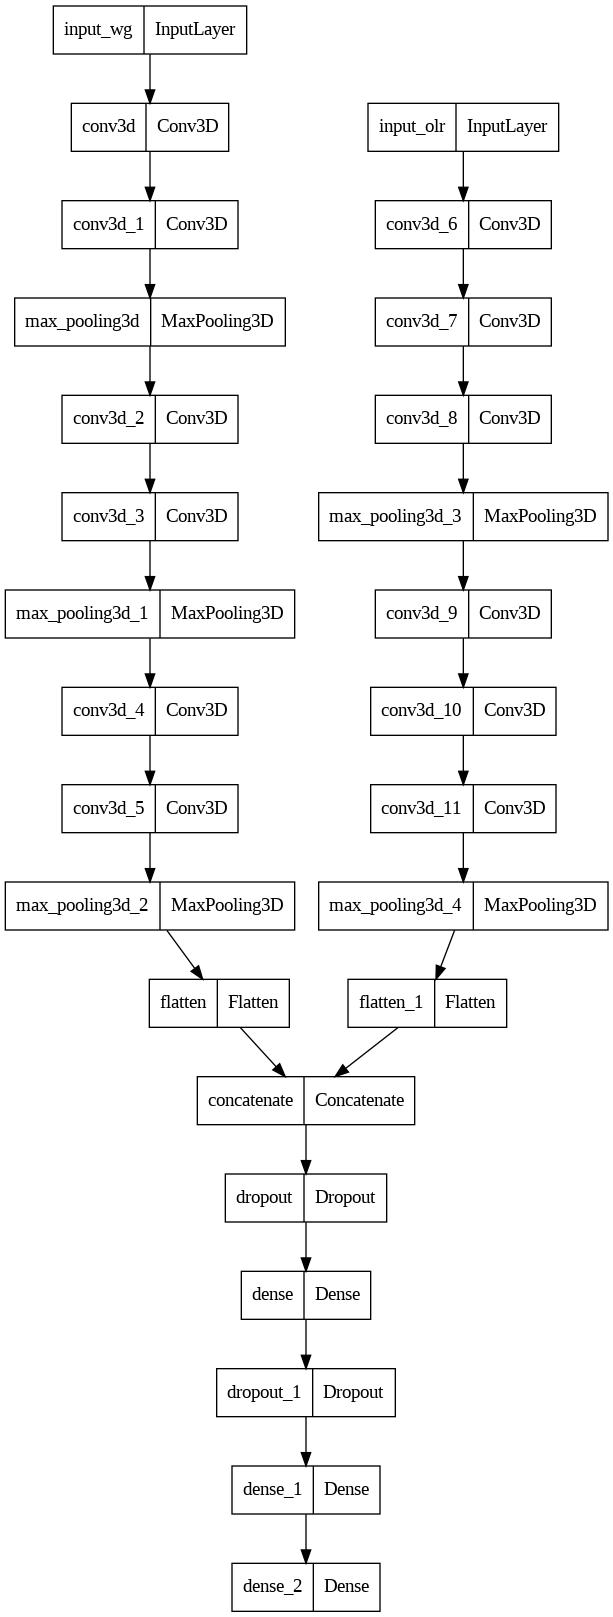

In [3]:
input_wg = keras.Input(shape=(30, 51, 241, 2), name="input_wg")
input_olr = keras.Input(shape=(30, 13, 144, 1), name="input_olr")
# args = parser.parse_args()
params_hp = {
    'rounds': 3,
    'n_c2d_filters_era5': 9,
    'n_c2d_r_era5': 2,
    'activation': 'relu',
    'rounds1': 3,
    'n_c2d_filters_olr': 3,
    'n_c2d_r_olr': 3,
    'activation1': 'elu',
    'rate': 0.0001,
    'activation2': 'relu',
    'activation3': 'elu',
    'metrics': 'mean_squared_error',
    'loss': 'mean_squared_logarithmic_error',
    'batch_size': 32}


def conv_2d_max_pool_seq (input_x, rounds, n_c2d_filters, n_c2d_r, activation, kernel_size=3):
    i = 0
    x = input_x
    while i < rounds:
        for n in range(1,n_c2d_r+1):
            x = layers.Conv3D(filters=n_c2d_filters*int(n+i), kernel_size= kernel_size, activation=activation, padding='same')(x)
            # print(d)
        x = layers.MaxPooling3D((2,2,2))(x)
        i = i+1
    x = layers.Flatten()(x)
    return(x)



def model_maker(params_hp):
    # input_wg = keras.Input(shape=(30, 51, 241, 2), name="input_wg")
    # input_olr = keras.Input(shape=(30, 13, 144, 1), name="input_olr")
    x = layers.concatenate([conv_2d_max_pool_seq(input_wg,
                                                rounds=params_hp['rounds'],
                                                n_c2d_filters=params_hp['n_c2d_filters_era5'],
                                                n_c2d_r = params_hp['n_c2d_r_era5'],
                                                activation = params_hp['activation'],
                                                kernel_size = 3),
                            conv_2d_max_pool_seq(input_olr,
                                                rounds=2,
                                                n_c2d_filters=params_hp['n_c2d_filters_olr'],
                                                n_c2d_r = params_hp['n_c2d_r_olr'],
                                                activation = params_hp['activation1'],
                                                kernel_size = 3)])

    l = [10, 10] #placeholder atm
    for h in l:
        x = layers.Dropout(0.001)(x)
        x = layers.Dense(h, params_hp['activation2'])(x)

    # 9 output categories
    outputs = layers.Dense(9, activation=params_hp['activation3'])(x) #ridge regression for regulizer


    return outputs


model = keras.Model(
    inputs = [input_wg, input_olr],
    outputs = model_maker(params_hp),
    name='tr'
)

model.summary()
keras.utils.plot_model(model)



Model: "tr"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_wg (InputLayer)          [(None, 30, 51, 241  0           []                               
                                , 2)]                                                             
                                                                                                  
 conv3d_12 (Conv3D)             (None, 30, 51, 241,  330         ['input_wg[0][0]']               
                                 6)                                                               
                                                                                                  
 conv3d_13 (Conv3D)             (None, 30, 51, 241,  1956        ['conv3d_12[0][0]']              
                                 12)                                                             

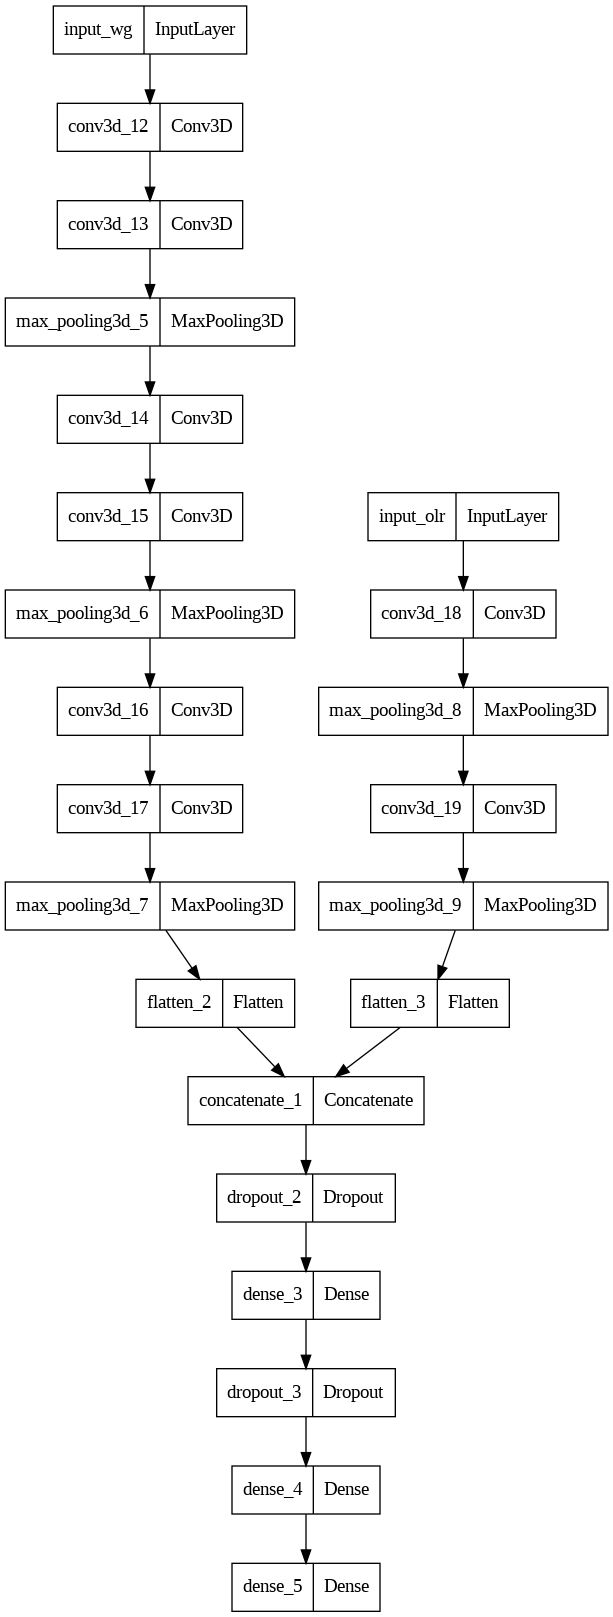

In [4]:
params_hp2 = {
    'rounds': 3,
    'n_c2d_filters_era5': 6,
    'n_c2d_r_era5': 2,
    'activation': 'relu',
    'rounds1': 3,
    'n_c2d_filters_olr': 3,
    'n_c2d_r_olr': 1,
    'activation1': 'elu',
    'rate': 0.001,
    'activation2': 'relu',
    'activation3': 'relu',
    'metrics': 'logcosh',
    'loss': 'mean_squared_logarithmic_error',
    'batch_size': 3}

model = keras.Model(
    inputs = [input_wg, input_olr],
    outputs = model_maker(params_hp2),
    name='tr'
)

model.summary()
keras.utils.plot_model(model)

Model: "tr"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_wg (InputLayer)          [(None, 30, 51, 241  0           []                               
                                , 2)]                                                             
                                                                                                  
 conv3d_20 (Conv3D)             (None, 30, 51, 241,  330         ['input_wg[0][0]']               
                                 6)                                                               
                                                                                                  
 conv3d_21 (Conv3D)             (None, 30, 51, 241,  1956        ['conv3d_20[0][0]']              
                                 12)                                                             

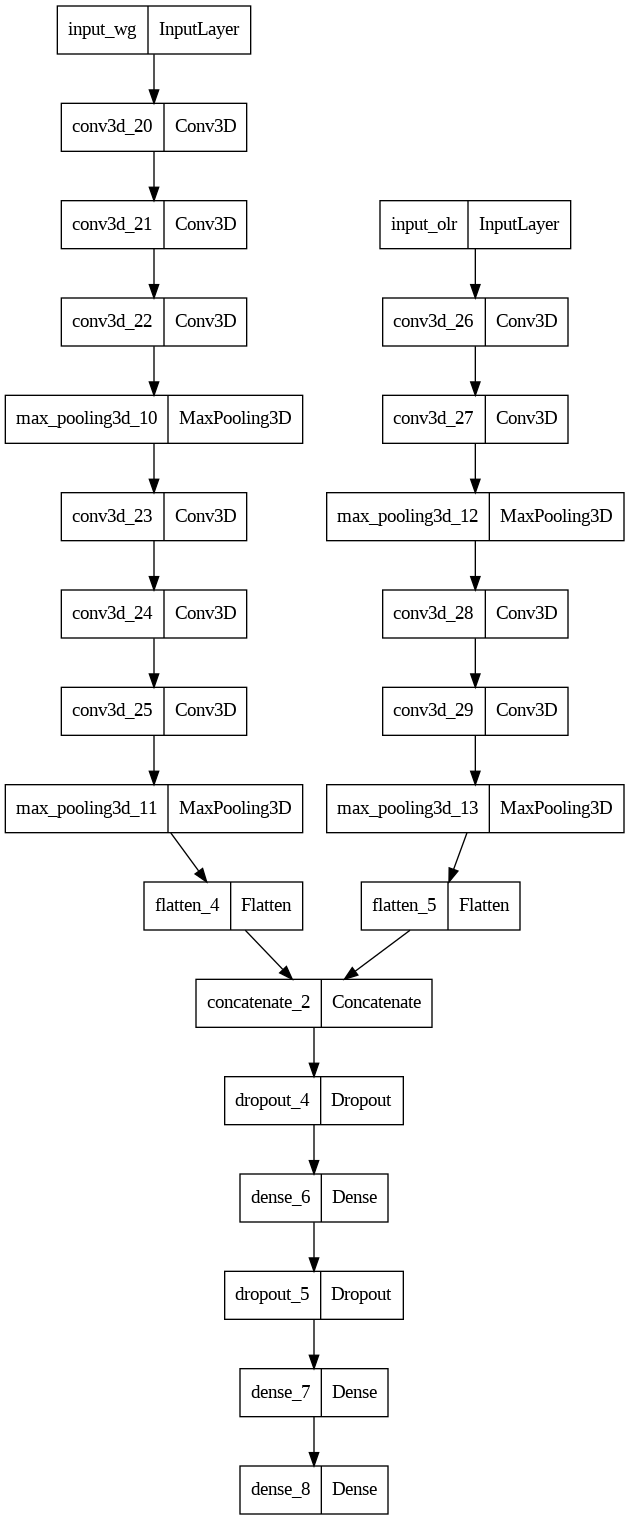

In [5]:
# Model being used!!!
params_hp2 = {
    'rounds': 2,
    'n_c2d_filters_era5': 6,
    'n_c2d_r_era5': 3,
    'activation': 'relu',
    'rounds1': 3,
    'n_c2d_filters_olr': 6,
    'n_c2d_r_olr': 2,
    'activation1': 'relu',
    'rate': 0.0001,
    'activation2': 'relu',
    'activation3': 'relu',
    'metrics': 'mean_absolute_percentage_error',
    'loss': 'mean_squared_logarithmic_error',
    'batch_size': 16}

model = keras.Model(
    inputs = [input_wg, input_olr],
    outputs = model_maker(params_hp2),
    name='tr'
)

model.summary()
keras.utils.plot_model(model)